<a href="https://colab.research.google.com/github/nishi1612/Modelling-and-Simulation/blob/master/Gambler's_Ruin_and_Birth_Death_Model_using_Markov's_Chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.colors as colors
import matplotlib.cm as cm

Gambler's Ruin Problem

In [0]:
N = 100
q = 0.6
p = 1 - q
init = np.arange(0,101,1)

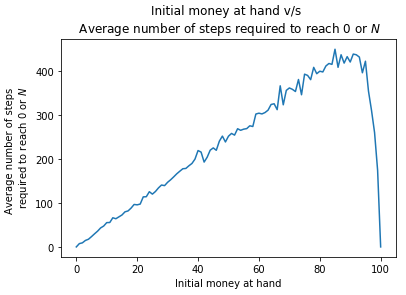

In [0]:
prob = [q,p]

times = []
went_to_N = []
for i in init:
  time = []
  vals = []
  runs = 100
  for j in range(runs):
    next_val = i
    k = 0
    while(True):
      if(next_val==0):
        break
      if(next_val==N):
        break
      rr = random.random()
      if(rr<prob[0]):
        next_val -= 1
      else:
        next_val += 1
      k += 1
    time.append(k)
    vals.append(next_val)
  j = 0
  for val in vals:
    if(val==N):
      j+=1
  went_to_N.append(j/runs)
  times.append(sum(time)/len(time))
plt.plot(init,times)
plt.title('Initial money at hand v/s \n Average number of steps required to reach 0 or $N$')
plt.xlabel('Initial money at hand')
plt.ylabel('Average number of steps \n required to reach 0 or $N$')
plt.show()

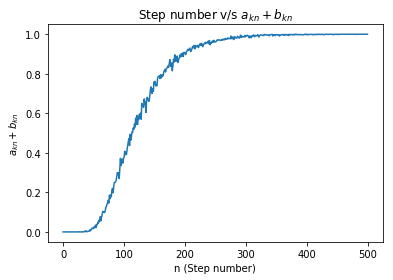

[]

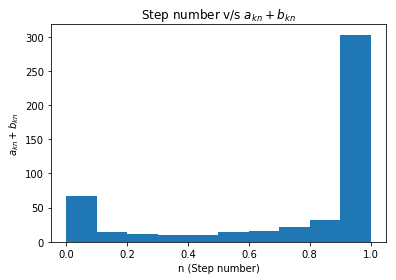

In [0]:
runs = 1000
N = 100
q = 0.6
n = 500
vals = np.zeros(n)
dict = {True:1, False:-1}       
for num in range(n):
  for r in range(runs):
    next_val = 25
    for j in range(num):
      next_val += dict[random.uniform(0,1)>q]
      if((next_val == 0) or (next_val == N)):
        vals[num] += 1
        break
probs = duration/runs
plt.plot(np.arange(n), probs)
plt.xlabel('n (Step number)')
plt.title('Step number v/s $a_{kn}+b_{kn}$')
plt.ylabel('$a_{kn}+b_{kn}$')
plt.show()
plt.hist(probs)
plt.xlabel('n (Step number)')
plt.title('Step number v/s $a_{kn}+b_{kn}$')
plt.ylabel('$a_{kn}+b_{kn}$')
plt.show()

Birth Death Model

In [0]:
N = 20
b = 0.025
d = 0.025
k = 0
P = np.zeros((21,21))
p = np.zeros((21,1))
p[5] = 1
P[0][0] = 1
j = 1
p = p.T
start_col = 0
while(True):
  if(j==20):
    break
  P[j][start_col] = j*d
  P[j][start_col + 1] = 1 - j*(b+d)
  P[j][start_col + 2] = j*b
  j = j + 1
  start_col += 1
P[20][20] = 1 - 20*d
P[20][19] = 20*d
k = 0
vals = np.zeros((401,21))
vals[0] = p
while(True):
  if(round(p[0][0],3)==1):
    break
  p = np.matmul(p,P)
  k+=1
  if(k%5==0 and k<=2000):
    vals[int(k/5)] = p
print(k)

4128


In [0]:
data_array = np.array(vals)
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
for i in range(401):
  for j in range(21):
    y_data[i][j] = y_data[i][j]*5
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()

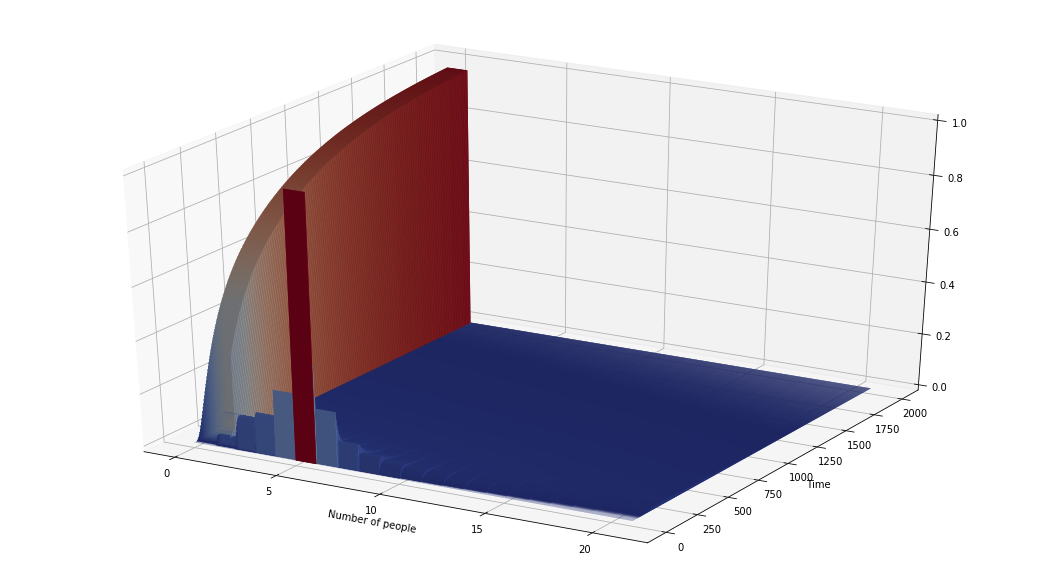

In [0]:
dz = z_data
offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
color_values = cm.coolwarm(norm(fracs.tolist()))
fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),1, 1, z_data, color=color_values)
plt.xlabel('Number of people')
plt.ylabel('Time')
plt.show()
# https://matplotlib.org/tutorials/colors/colormaps.html

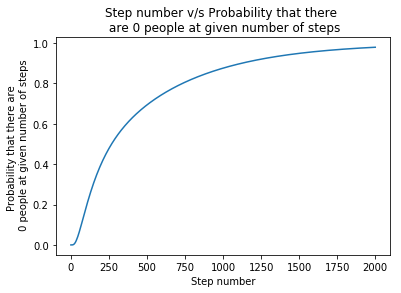

In [0]:
time = []
for i in range(2001):
  if(i%5==0):
    time.append(i)
val = np.zeros((401,1))
for i in range(401):
  val[i] = vals[i][0]
plt.plot(time,val)
plt.xlabel('Step number')
plt.title('Step number v/s Probability that there \n are 0 people at given number of steps')
plt.ylabel('Probability that there are \n 0 people at given number of steps')
plt.show()

In [0]:
N = 100
r = 0.005/2
K = 50
k = 0
P = np.zeros((101,101))
p = np.zeros((101,1))
p[5] = 1
P[0][0] = 1
j = 1
p = p.T
start_col = 0
while(True):
  if(j==100):
    break
  P[j][start_col] = (j*j*r/K)
  P[j][start_col + 2] = j*r
  P[j][start_col + 1] = 1 - P[j][start_col] - P[j][start_col+2]
  j = j + 1
  start_col += 1
P[100][100] = 1 - (100*r*r/K)
P[100][99] = (100*r*r/K)
k = 0
vals = np.zeros((401,101))
vals[0] = p
while(True):
  if(round(p[0][0],3)==1):
    break
  p = np.matmul(p,P)
  k += 1
  if(k%5==0 and k<=2000):
    vals[int(k/5)] = p
  if(k==2000):
    break

In [0]:
data_array = np.array(vals)
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
for i in range(401):
  for j in range(101):
    y_data[i][j] = y_data[i][j]*5
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()

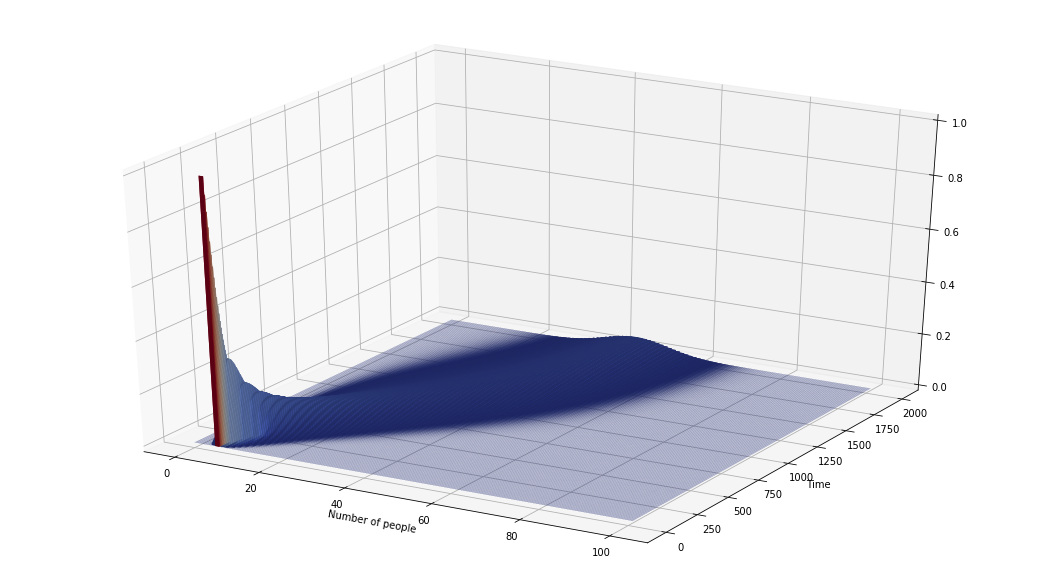

In [0]:
dz = z_data
offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
color_values = cm.coolwarm(norm(fracs.tolist()))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(18.5, 10.5)
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),1, 1, z_data, color=color_values)
plt.xlabel('Number of people')
plt.ylabel('Time')
plt.show()
# https://matplotlib.org/tutorials/colors/colormaps.html

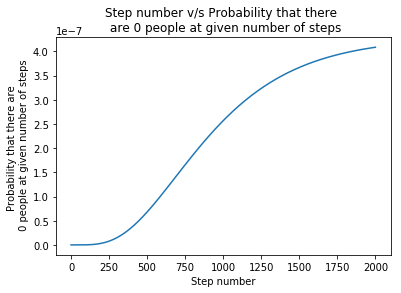

In [0]:
time = []
for i in range(2001):
  if(i%5==0):
    time.append(i)
val = np.zeros((401,1))
for i in range(401):
  val[i] = vals[i][0]
plt.plot(time,val)
plt.xlabel('Step number')
plt.title('Step number v/s Probability that there \n are 0 people at given number of steps')
plt.ylabel('Probability that there are \n 0 people at given number of steps')
plt.show()

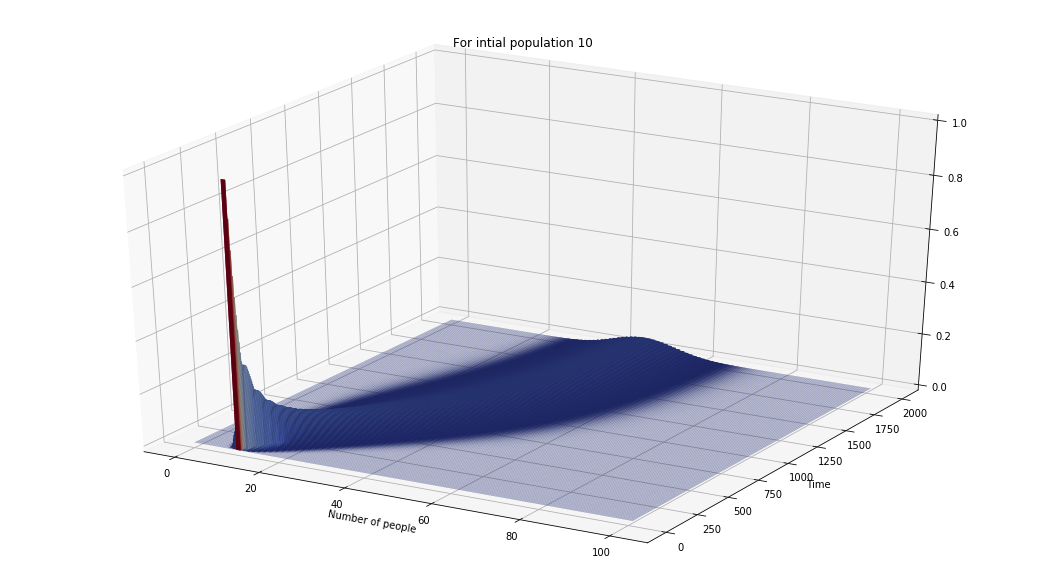

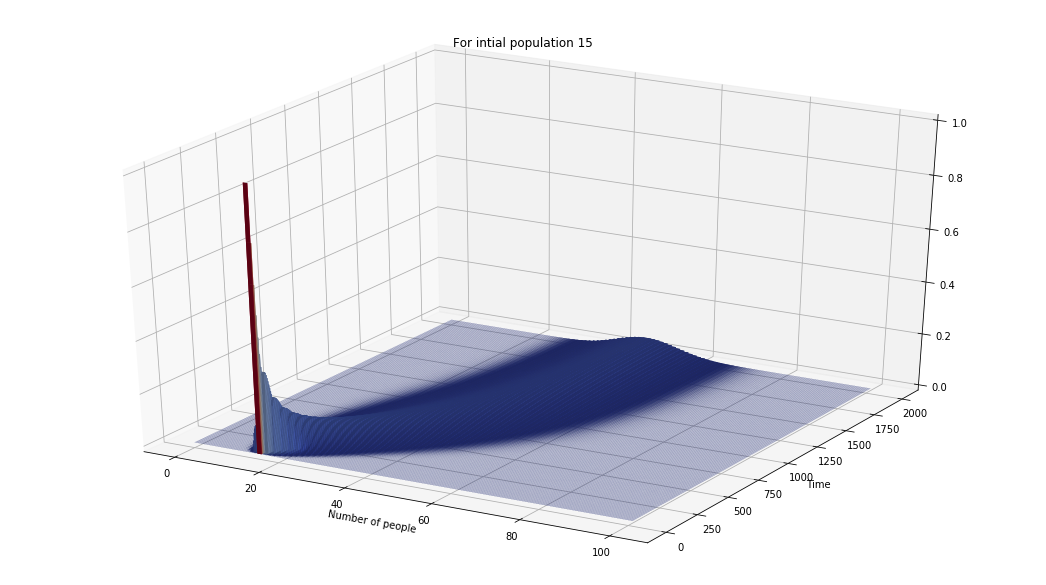

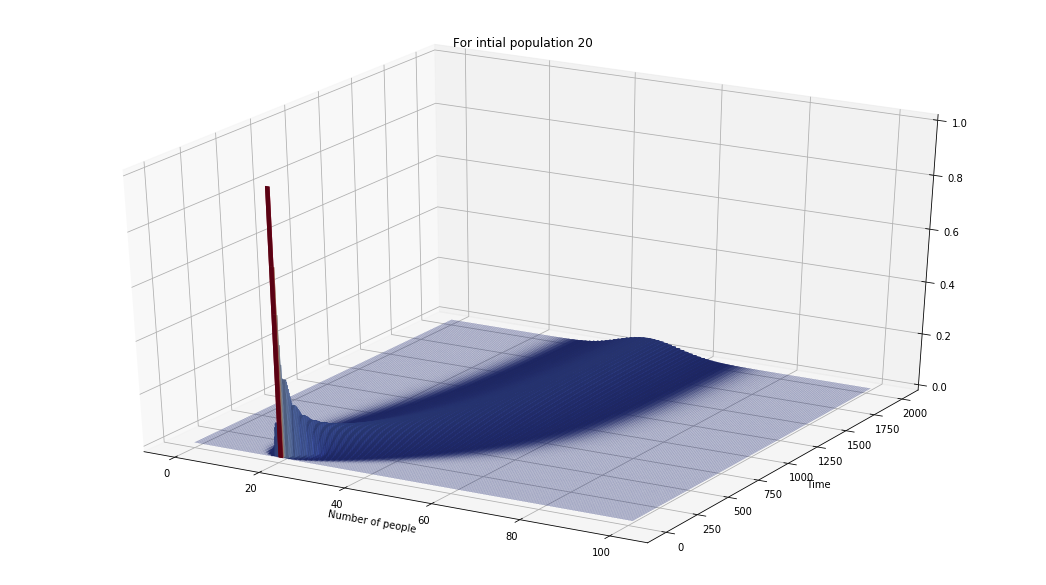

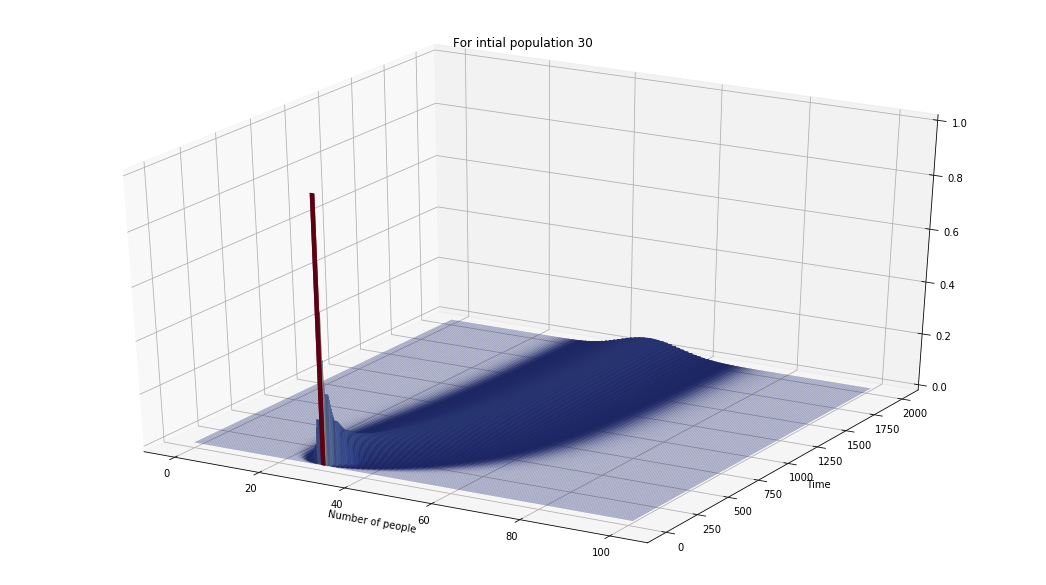

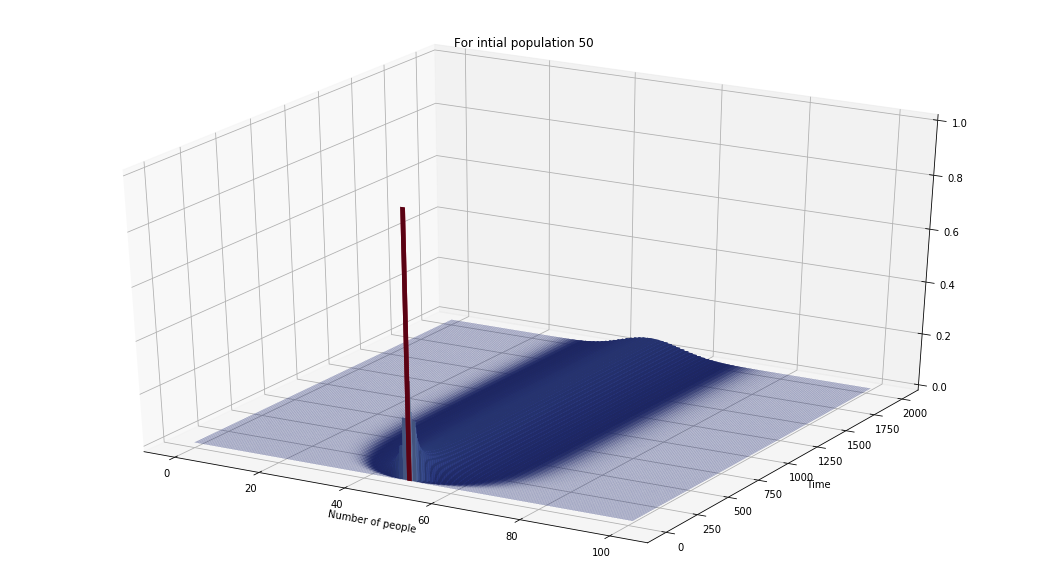

In [0]:
init = [10,15,20,30,50]
for init_pop in init:
  N = 100
  r = 0.005/2
  K = 50
  k = 0
  P = np.zeros((101,101))
  p = np.zeros((101,1))
  p[init_pop] = 1
  P[0][0] = 1
  j = 1
  p = p.T
  start_col = 0
  while(True):
    if(j==100):
      break
    P[j][start_col] = (j*j*r/K)
    P[j][start_col + 2] = j*r
    P[j][start_col + 1] = 1 - P[j][start_col] - P[j][start_col+2]
    j = j + 1
    start_col += 1
  P[100][100] = 1 - (100*r*r/K)
  P[100][99] = (100*r*r/K)
  k = 0
  vals = np.zeros((401,101))
  vals[0] = p
  while(True):
    if(round(p[0][0],3)==1):
      break
    p = np.matmul(p,P)
    k += 1
    if(k%5==0 and k<=2000):
      vals[int(k/5)] = p
    if(k==2000):
      break
  data_array = np.array(vals)
  x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                                np.arange(data_array.shape[0]) )
  for i in range(401):
    for j in range(101):
      y_data[i][j] = y_data[i][j]*5
  x_data = x_data.flatten()
  y_data = y_data.flatten()
  z_data = data_array.flatten()
  dz = z_data
  offset = dz + np.abs(dz.min())
  fracs = offset.astype(float)/offset.max()
  norm = colors.Normalize(fracs.min(), fracs.max())
  color_values = cm.coolwarm(norm(fracs.tolist()))
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  fig.set_size_inches(18.5, 10.5)
  ax.bar3d( x_data,
            y_data,
            np.zeros(len(z_data)),1, 1, z_data, color=color_values)
  plt.xlabel('Number of people')
  plt.ylabel('Time')
  plt.title('For intial population ' + str(init_pop))
  plt.show()
  # https://matplotlib.org/tutorials/colors/colormaps.html

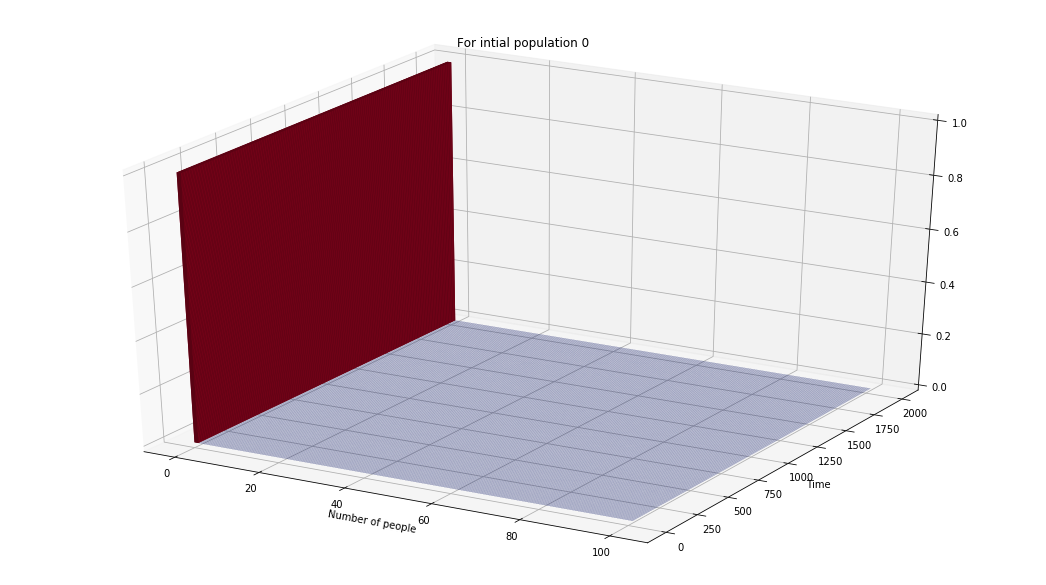

In [0]:
init_pop = 0
N = 100
r = 0.005/2
K = 50
k = 0
P = np.zeros((101,101))
p = np.zeros((101,1))
p[init_pop] = 1
P[0][0] = 1
j = 1
p = p.T
start_col = 0
while(True):
  if(j==100):
    break
  P[j][start_col] = (j*j*r/K)
  P[j][start_col + 2] = j*r
  P[j][start_col + 1] = 1 - P[j][start_col] - P[j][start_col+2]
  j = j + 1
  start_col += 1
P[100][100] = 1 - (100*r*r/K)
P[100][99] = (100*r*r/K)
k = 0
vals = np.zeros((401,101))
vals[0] = p
while(True):
  p = np.matmul(p,P)
  k += 1
  if(k%5==0 and k<=2000):
    vals[int(k/5)] = p
  if(k==2000):
    break
data_array = np.array(vals)
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
for i in range(401):
  for j in range(101):
    y_data[i][j] = y_data[i][j]*5
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
dz = z_data
offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
color_values = cm.coolwarm(norm(fracs.tolist()))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(18.5, 10.5)
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),1, 1, z_data, color=color_values)
plt.xlabel('Number of people')
plt.ylabel('Time')
plt.title('For intial population ' + str(init_pop))
plt.show()
# https://matplotlib.org/tutorials/colors/colormaps.html